FNN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)
Epoch 1/30, Train Loss: 1.6823, Test Loss: 1.6131
Epoch 2/30, Train Loss: 1.6068, Test Loss: 1.5994
Epoch 3/30, Train Loss: 1.5270, Test Loss: 1.5069
Epoch 4/30, Train Loss: 1.5024, Test Loss: 1.5022
Epoch 5/30, Train Loss: 1.4952, Test Loss: 1.4955
Epoch 6/30, Train Loss: 1.4913, Test Loss: 1.4960
Epoch 7/30, Train Loss: 1.4872, Test Loss: 1.4952
Epoch 8/30, Train Loss: 1.4854, Test Loss: 1.4907
Epoch 9/30, Train Loss: 1.4833, Test Loss: 1.4933
Epoch 10/30, Train Loss: 1.4814, Test Loss: 1.4896
Epoch 11/30, Train Loss: 1.4800, Test Loss: 1.4877
Epoch 12/30, Train Loss: 1.4790, Test Loss: 1.4890
Epoch 13/30, Train Loss: 1.4777, Test Loss: 1.4848
Epoch 14/30, Train Loss: 1.4763, Test Loss: 1.4850
Epoch 15/30, Train Loss: 1.4760, Test Loss: 1.4849
Epoch 16/

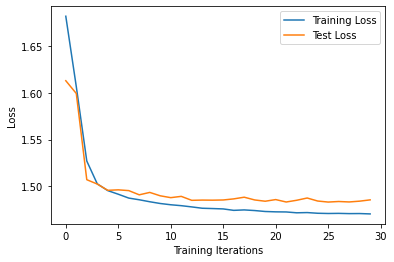

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


# Define FNN model
class FNN(nn.Module):
    def __init__(self):
        super(FNN, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = x.view(-1, 784)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.softmax(x)
        return x

# Load MNIST data
train_data = MNIST('data', train=True, download=True, transform=ToTensor())
test_data = MNIST('data', train=False, download=True, transform=ToTensor())

# Define dataloader
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# Define model, loss function, and optimizer
model = FNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
print(model)

# Train model
train_loss = []
test_loss = []
num_epochs = 30
for epoch in range(num_epochs):
    running_train_loss = 0.0
    running_test_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_train_loss += loss.item()
    train_loss.append(running_train_loss / len(train_loader))
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_test_loss += loss.item()
        test_loss.append(running_test_loss / len(test_loader))
    print(f'Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss[-1]:.4f}, Test Loss: {test_loss[-1]:.4f}')

# Graph Plots
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Test Loss')
plt.legend()
plt.xlabel('Training Iterations')
plt.ylabel('Loss')
plt.show()
